## 1. 인코딩 및 평가지표 실습

In [1]:
import warnings  
warnings.filterwarnings(action="ignore")

In [9]:
#파이썬에서 R처럼 데이터프레임을 사용하기 위한 라이브러리 호출
import pandas as pd

#데이터 불러오기
data = pd.read_csv('타이타닉 data.csv')  #R의 read.csv()

#Age 변수를 구간 나눠서 순서형 범주 변수로 변환 (수준5개)
data['Agegroup'] =  pd.cut(x=data['Age'],bins=5,labels=['baby','young','middle age','old','very old'])

#안 쓸 변수 제거
data.drop(['PassengerId','Name','Pclass','SibSp','Parch', 'Ticket', 'Cabin', 'Age'],axis=1,inplace=True) 

#NA 있는 행 제거 (원래는 무작정 제거하면 안됩니다...!)
data.dropna(axis=0, inplace = True)#inlpace=True하면 원본 데이터 알아서 바뀜
data.isna().sum()#NA 있는 열 확인
data.reset_index(drop=True,inplace=True) #인덱스 리셋 


In [3]:
data.head()

,Survived,Sex,Fare,Embarked,Agegroup
0,0,male,7.2500,S,young
1,1,female,71.2833,C,middle age
2,1,female,7.9250,S,young
3,1,female,53.1000,S,middle age
4,0,male,8.0500,S,middle age


#### 1. Agegroup 변수에 Ordinal Encoding 적용

In [4]:
data['Agegroup']

0           young
1      middle age
2           young
3      middle age
4      middle age
          ...    
707    middle age
708         young
709         young
710         young
711         young
Name: Agegroup, Length: 712, dtype: category
Categories (5, object): ['baby' < 'young' < 'middle age' < 'old' < 'very old']

In [12]:
##1. map 사용
#순서도 같이 입력해주어야함
seq = {'baby' : 1, 'young' : 2, 'middle age' : 3, 'old' : 4, 'very old' : 5}
data['Agegroup'] = data['Agegroup'].map(seq)
data.head()

,Survived,Sex,Fare,Agegroup,Embarked_Q,Embarked_S
0,0,1,7.2500,2,0.0,1.0
1,1,0,71.2833,3,0.0,0.0
2,1,0,7.9250,2,0.0,1.0
3,1,0,53.1000,3,0.0,1.0
4,0,1,8.0500,3,0.0,1.0


In [6]:
##2. category_encoders의 OrdinalEncoder

data2 = data.copy() #원본데이터 수정 막기위해 다른 곳에 저장

from category_encoders import OrdinalEncoder
enc = OrdinalEncoder()
data2['Agegroup'] = enc.fit_transform(data2['Agegroup'])
data2.head()

# data['Agegroup']은 이미 순서정보가 저장되어 있는 변수이기 때문에 
# 우리가 원하는 순서대로 encoding이 된 것!
# 따라서 이 방법을 사용하려면 변수가 "순서가 있는 category형 변수"여야 함
# + Label Encoding과도 차이를 주기 위함!

,Survived,Sex,Fare,Embarked,Agegroup
0,0,male,7.2500,S,2
1,1,female,71.2833,C,3
2,1,female,7.9250,S,2
3,1,female,53.1000,S,3
4,0,male,8.0500,S,3


In [7]:
#순서 정보 집어넣는 법
# pd.Categorical() 사용
data3 = data.copy() #원본데이터 수정 막기위해 다른 곳에 저장
data3['Embarked']=pd.Categorical(data3['Embarked'],categories=['S','C','Q'], ordered=True)
data3['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
707    Q
708    S
709    S
710    C
711    Q
Name: Embarked, Length: 712, dtype: category
Categories (3, object): ['S' < 'C' < 'Q']

#### 2. Embarked 변수에 One Hot Encoding 적용   
 - Embarked는 탑승지역을 의미하는 변수
 - level : C/Q/S로 3개

In [8]:
#One-Hot 인코딩
##1. pandas의 get_dummies
# 알아서 data에 붙여줌
x_one1 = pd.get_dummies(data =data, columns=['Embarked'], prefix='Embarked')#prefix는 가변수 이름 앞에 글자 붙여주는 기능. 옵션임!
x_one1.head()

,Survived,Sex,Fare,Agegroup,Embarked_C,Embarked_Q,Embarked_S
0,0,male,7.2500,2,0,0,1
1,1,female,71.2833,3,1,0,0
2,1,female,7.9250,2,0,0,1
3,1,female,53.1000,3,0,0,1
4,0,male,8.0500,3,0,0,1


In [10]:
##2. sklearn의 OneHotEncoder
# 데이터셋에 따로 붙여줘야함

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop='first') # drop='first'로 기준범주 제거 가능 
x_one2 = pd.DataFrame(enc.fit_transform(data['Embarked'].values.reshape(-1,1)).toarray(),columns=['Embarked_Q','Embarked_S'])

#enc = OneHotEncoder()
#x_one3 = pd.DataFrame(enc.fit_transform(data['Embarked'].values.reshape(-1,1)).toarray(),columns=['Embarked_C','Embarked_Q','Embarked_S'])

#데이터셋에 따로 붙여주기
data = pd.concat([data, x_one2], axis=1).drop(['Embarked'],axis=1) #R의 cbind()와 동일 / axis=0이면 rbind()와 동일
data.head()

,Survived,Sex,Fare,Agegroup,Embarked_Q,Embarked_S
0,0,male,7.2500,young,0.0,1.0
1,1,female,71.2833,middle age,0.0,0.0
2,1,female,7.9250,young,0.0,1.0
3,1,female,53.1000,middle age,0.0,1.0
4,0,male,8.0500,middle age,0.0,1.0


#### 3.Sex 변수에 Label Encoding 적용

In [11]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['Sex'] = enc.fit_transform(data['Sex'])
data.head()

,Survived,Sex,Fare,Agegroup,Embarked_Q,Embarked_S
0,0,1,7.2500,young,0.0,1.0
1,1,0,71.2833,middle age,0.0,0.0
2,1,0,7.9250,young,0.0,1.0
3,1,0,53.1000,middle age,0.0,1.0
4,0,1,8.0500,middle age,0.0,1.0


#### 4. 로지스틱회귀를 사용한 모델링

In [13]:
#X와 Y분리
x = data.iloc[:,data.columns != 'Survived']
y = data.iloc[:,data.columns == 'Survived'] #target 변수인 Survived를 Y로 저장

#train set과 validation set 구분
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) #7:3 

#로지스틱 회귀 모델 적합 
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test) #validation set 통한 검증

#### 5.혼동행렬 및 평가지표 계산

In [14]:
#혼동행렬
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred,labels=[1, 0]) #교안 모양과 같게하기 위해 label 순서 정해줌

#평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
ac = accuracy_score(y_test, y_pred) #accuracy(정확도)
pr = precision_score(y_test, y_pred) #precision(정밀도)
rc = recall_score(y_test, y_pred) #recall(민감도)
f1 = f1_score(y_test, y_pred) #F1-score
mc = matthews_corrcoef(y_test, y_pred) #MCC(매튜상관계수)

print(f'<Confusion Matrix>\n {cm.T} \n\nAccuracy : {ac:.4f} \nPrecision : {pr:.4f} \nRecall : {rc:.4f} \nF1-Score : {f1:.4f} \nMCC : {mc:.4f}')

<Confusion Matrix>
 [[ 50  26]
 [ 25 113]] 

Accuracy : 0.7617 
Precision : 0.6579 
Recall : 0.6667 
F1-Score : 0.6623 
MCC : 0.4782


In [15]:
#Precision 직접 계산
50 / (50+26)

0.6578947368421053

#### 6. ROC곡선과 AUC

      cutoff       fpr       tpr
0   1.982792  0.000000  0.000000
1   0.982792  0.000000  0.013333
2   0.981639  0.000000  0.040000
3   0.860398  0.000000  0.173333
4   0.854436  0.014388  0.173333
..       ...       ...       ...
88  0.146907  0.913669  0.986667
89  0.144039  0.928058  0.986667
90  0.127356  0.956835  0.986667
91  0.125089  0.956835  1.000000
92  0.098444  1.000000  1.000000

[93 rows x 3 columns]

AUC : 0.8150


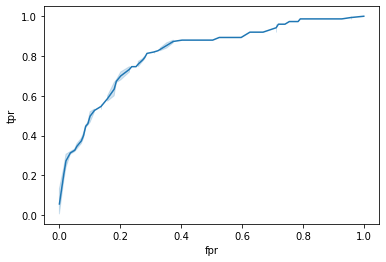

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
prob_positive_pred = lr.predict_proba(x_test)[:, 1] #예측값이 1일 확률

fpr, tpr, cutoff = roc_curve(y_test, prob_positive_pred) #각 확률을 cutoff point로 정해서 ROC 그림! 

#ROC곡선 시각화
df = {"cutoff":cutoff, "fpr":fpr, "tpr":tpr}
df = pd.DataFrame.from_dict(df)
print(df)
import seaborn as sns
sns.lineplot(x="fpr", y="tpr", data=df)

#AUC 계산
auc = roc_auc_score(y_test, prob_positive_pred)
print(f'\nAUC : {auc:.4f}')

## 2. 샘플링 실습

이전 실습과 변수명 등이 같아서 혼동이 생길 수 있으니  
시작하기 전에 **맨 위 도구상자**에 보이는 **새로고침 버튼**을 눌러서  
kernel을 재시작하세요~

In [1]:
import warnings  
warnings.filterwarnings(action="ignore")

In [2]:
# 데이터 불러오기 
import pandas as pd
data = pd.read_csv("샘플링 실습 data.csv")

<AxesSubplot:xlabel='cls', ylabel='count'>

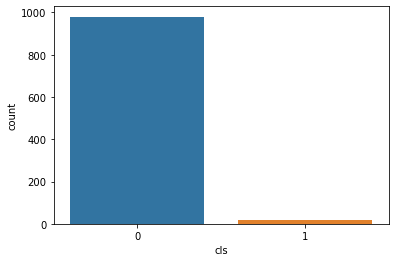

In [3]:
#X, Y 분리
y = data['cls']
x = data.drop(['cls'],axis=1)

#Y의 분포 확인
import seaborn as sns
sns.countplot(y) #엄청난 불균형 데이터!

#### 1. 언더샘플링

원래 0 :  980 
Random UnderSampling 결과 :  20


<AxesSubplot:xlabel='cls', ylabel='count'>

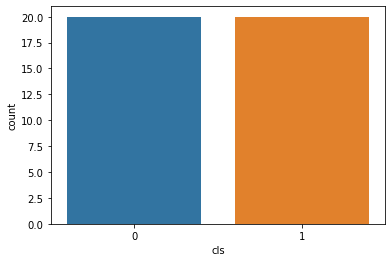

In [4]:
#1. Random Under Sampling
from imblearn.under_sampling import RandomUnderSampler
rus_x, rus_y = RandomUnderSampler(random_state = 10).fit_resample(x, y) # random_state는 R의 seed()와 같음! 
rus = pd.concat([rus_y,rus_x],axis=1)

print('원래 0 : ',sum(y==0) ,'\nRandom UnderSampling 결과 : ',sum(rus['cls']==0))
sns.countplot(rus['cls']) #균형 + count 수가 엄청 줄어듦

원래 0 :  980 
CNN 결과 :  21


<AxesSubplot:xlabel='cls', ylabel='count'>

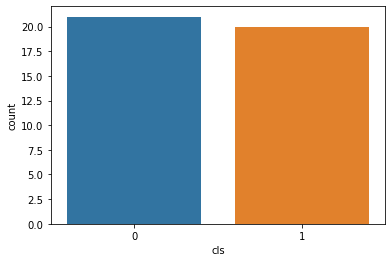

In [19]:
#2. Condensed Nearest Neighbors
# KNN 알고리즘 적용해 다수 클래스 데이터가 밀집된 곳을 지움
# 아직은 랜덤
from imblearn.under_sampling import CondensedNearestNeighbour

cnn_x, cnn_y = CondensedNearestNeighbour(n_neighbors=1, random_state = 10).fit_resample(x, y) 
cnn = pd.concat([cnn_y,cnn_x],axis=1)

print('원래 0 : ',sum(y==0) ,'\nCNN 결과 : ',sum(cnn['cls']==0))
sns.countplot(cnn['cls']) #균형 + count 수가 엄청 줄어듦

원래 0 :  980 
ENN 결과 :  967


<AxesSubplot:xlabel='cls', ylabel='count'>

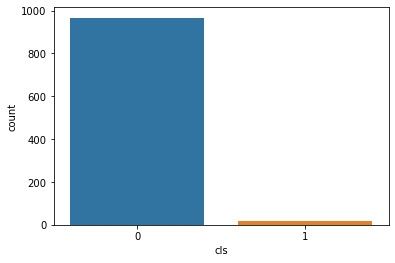

In [20]:
#3. Edited Nearest Neighbors
# 클래스 경계의 noisy 데이터만 제거 
# 아주 좋은 성능은 안보이기 때문에 다른 기법과 결합해서 사용
from imblearn.under_sampling import EditedNearestNeighbours

enn_x, enn_y = EditedNearestNeighbours(n_neighbors=3).fit_resample(x, y) #더이상 랜덤X
enn = pd.concat([enn_y,enn_x],axis=1)

print('원래 0 : ',sum(y==0) ,'\nENN 결과 : ',sum(enn['cls']==0))
sns.countplot(enn['cls']) #그렇게 많이 제거하지 않음!

원래 0 :  980 
Tomek Links 결과 :  975


<AxesSubplot:xlabel='cls', ylabel='count'>

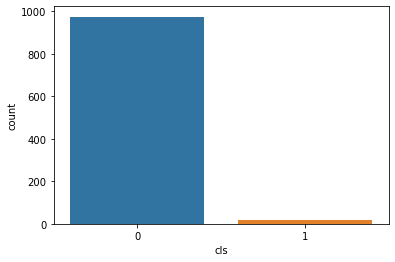

In [21]:
#4. Tomek Links
# 클래스 경계의 noisy 데이터만 제거
# 아주 좋은 성능은 안보이기 때문에 다른 기법과 결합해서 사용
from imblearn.under_sampling import TomekLinks

tl_x, tl_y = TomekLinks().fit_resample(x, y)
tl = pd.concat([tl_y,tl_x],axis=1)

print('원래 0 : ',sum(y==0) ,'\nTomek Links 결과 : ',sum(tl['cls']==0))
sns.countplot(tl['cls']) #그렇게 많이 제거하지 않음!

원래 0 :  980 
OSS 결과 :  111


<AxesSubplot:xlabel='cls', ylabel='count'>

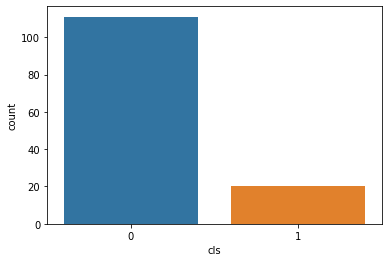

In [22]:
#5. One-sided selection
#Tomek Links + CNN
from imblearn.under_sampling import OneSidedSelection
oss_x, oss_y = OneSidedSelection(n_neighbors=1, n_seeds_S=100).fit_resample(x, y) #n_seeds_S로 다수클래스 수 대략 조정 가능
oss = pd.concat([oss_y,oss_x],axis=1)

print('원래 0 : ',sum(y==0) ,'\nOSS 결과 : ',sum(oss['cls']==0))
sns.countplot(oss['cls']) # 다수 클래스가 많이 제거됐지만 불균형 해소는X

원래 0 :  980 
NCR 결과 :  973


<AxesSubplot:xlabel='cls', ylabel='count'>

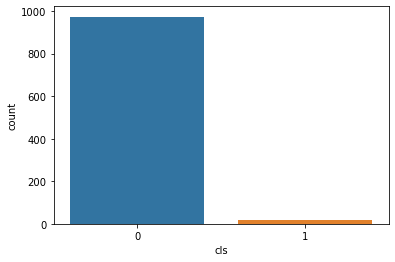

In [23]:
#6.Neighborhood Cleaning 
#CNN + ENN
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr_x, ncr_y =  NeighbourhoodCleaningRule(n_neighbors=1, threshold_cleaning=0.5).fit_resample(x, y) 
ncr = pd.concat([ncr_y,ncr_x],axis=1)

print('원래 0 : ',sum(y==0) ,'\nNCR 결과 : ',sum(ncr['cls']==0))
sns.countplot(ncr['cls']) #그렇게 많이 제거하지 않음!

#### 2. 오버샘플링

원래 1 :  20 
Random Oversampling 결과 :  980


<AxesSubplot:xlabel='cls', ylabel='count'>

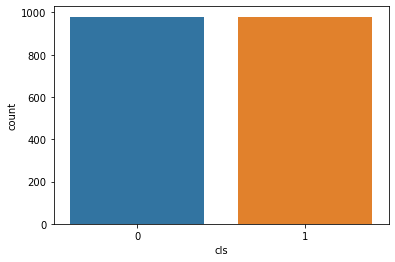

In [24]:
#1. Random Over Sampling
from imblearn.over_sampling import RandomOverSampler
ros_x, ros_y = RandomOverSampler(random_state = 10).fit_resample(x, y) # random_state는 R의 seed()와 같음! 
ros = pd.concat([ros_y,ros_x],axis=1)

print('원래 1 : ',sum(y==1) ,'\nRandom Oversampling 결과 : ',sum(ros['cls']==1))
sns.countplot(ros['cls']) 

원래 1 :  20 
SMOTE 결과 :  980


<AxesSubplot:xlabel='cls', ylabel='count'>

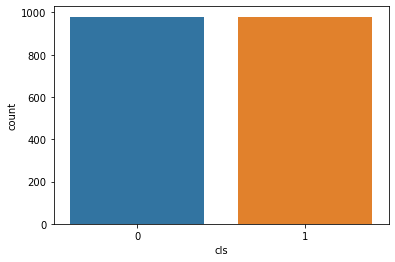

In [25]:
#2. SMOTE
from imblearn.over_sampling import SMOTE
smt_x, smt_y = SMOTE().fit_resample(x, y) 
smt = pd.concat([smt_y,smt_x],axis=1)

print('원래 1 : ',sum(y==1) ,'\nSMOTE 결과 : ',sum(smt['cls']==1))
sns.countplot(smt['cls']) 

원래 1 :  20 
Borderline-SMOTE 결과 :  980


<AxesSubplot:xlabel='cls', ylabel='count'>

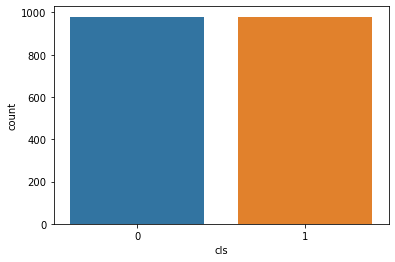

In [26]:
#3. Borderline-SMOTE
# misclassified 데이터 확인에 KNN 알고리즘 사용
# 클래스 경계 근처에 소수클래스 데이터 생성
from imblearn.over_sampling import BorderlineSMOTE
bsmt_x, bsmt_y = BorderlineSMOTE().fit_resample(x, y) 
bsmt = pd.concat([bsmt_y,bsmt_x],axis=1)

print('원래 1 : ',sum(y==1) ,'\nBorderline-SMOTE 결과 : ',sum(bsmt['cls']==1))
sns.countplot(bsmt['cls']) 

원래 1 :  20 
SVMSMOTE 결과 :  980


<AxesSubplot:xlabel='cls', ylabel='count'>

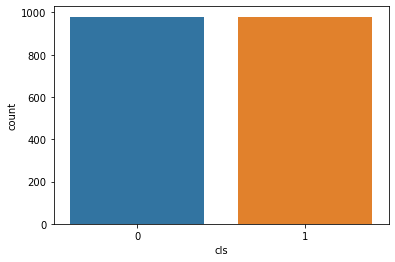

In [27]:
#4. Borderline-SMOTE SVM (SVMSMOTE)
# misclassified 데이터 확인에 SVM 사용
# 클래스 경계 근처에 소수클래스 데이터 생성
from imblearn.over_sampling import SVMSMOTE
ssmt_x, ssmt_y = SVMSMOTE().fit_resample(x, y) 
ssmt = pd.concat([ssmt_y,ssmt_x],axis=1)

print('원래 1 : ',sum(y==1) ,'\nSVMSMOTE 결과 : ',sum(ssmt['cls']==1))
sns.countplot(ssmt['cls']) 

원래 1 :  20 
ADASYN 결과 :  980


<AxesSubplot:xlabel='cls', ylabel='count'>

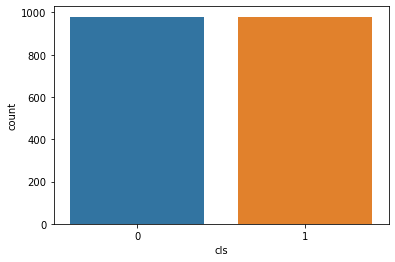

In [28]:
#5. ADASYN
# 소수클래스의 밀도분포를 고려해서 데이터 생성
# 밀도에 가중치를 두어 밀도가 낮으면 많이, 높으면 조금 생성
from imblearn.over_sampling import ADASYN
ads_x, ads_y = ADASYN().fit_resample(x, y) 
ads = pd.concat([ads_y,ads_x],axis=1)

print('원래 1 : ',sum(y==1) ,'\nADASYN 결과 : ',sum(ads['cls']==1))
sns.countplot(ads['cls'])

## 3. 인코딩 실습

이전 실습과 변수명 등이 같아서 혼동이 생길 수 있으니  
시작하기 전에 맨 위 도구상자에 보이는 새로고침 버튼을 눌러서  
kernel을 재시작하세요~

In [1]:
import warnings  
warnings.filterwarnings(action="ignore")

In [2]:
# 데이터 불러오기 
import pandas as pd
data = pd.read_csv("인코딩 실습 data.csv")
data = data[['transaction_real_price','city','dong','apt']]
data

,transaction_real_price,city,dong,apt
0,37500,서울특별시,신교동,신현(101동)
1,20000,서울특별시,필운동,사직파크맨션
2,38500,서울특별시,필운동,두레엘리시안
3,118000,서울특별시,내수동,파크팰리스
4,120000,서울특별시,내수동,킹스매너
...,...,...,...,...
1216548,22000,부산광역시,정관읍 용수리,정관 동일스위트1차
1216549,30750,부산광역시,정관읍 용수리,정관 동일스위트1차
1216550,29500,부산광역시,정관읍 용수리,정관 동일스위트1차
1216551,26700,부산광역시,정관읍 용수리,정관신도시롯데캐슬


#### 1. apt 변수에 Mean Encoding (Target Encoding)  적용

In [3]:
#apt별로 groupby해서 평균계산!
mean_encoding = data.groupby(['apt'])['transaction_real_price'].mean().to_dict()

#map()로 적용
data['apt'] = data['apt'].map(mean_encoding)
data#같은 아파트끼리는 같은 값이 나옴!

,transaction_real_price,city,dong,apt
0,37500,서울특별시,신교동,46040.000000
1,20000,서울특별시,필운동,20000.000000
2,38500,서울특별시,필운동,53284.615385
3,118000,서울특별시,내수동,107134.545455
4,120000,서울특별시,내수동,114846.666667
...,...,...,...,...
1216548,22000,부산광역시,정관읍 용수리,23325.710872
1216549,30750,부산광역시,정관읍 용수리,23325.710872
1216550,29500,부산광역시,정관읍 용수리,23325.710872
1216551,26700,부산광역시,정관읍 용수리,26787.013725


#### 2. dong 변수에 Leave One Out Encoding 적용

In [32]:
from category_encoders import LeaveOneOutEncoder
enc = LeaveOneOutEncoder()
data['dong'] = enc.fit_transform(data['dong'],data['transaction_real_price'])
data #같은 동임에도 다른 값이 나옴!

,transaction_real_price,city,dong,apt
0,37500,서울특별시,47056.250000,46040.000000
1,20000,서울특별시,63410.344828,20000.000000
2,38500,서울특별시,62772.413793,53284.615385
3,118000,서울특별시,107849.009901,107134.545455
4,120000,서울특별시,107839.108911,114846.666667
...,...,...,...,...
1216548,22000,부산광역시,27301.047863,23325.710872
1216549,30750,부산광역시,27299.258130,23325.710872
1216550,29500,부산광역시,27299.513807,23325.710872
1216551,26700,부산광역시,27300.086521,26787.013725


#### 3. city변수에 CatBoost Encoding (Ordered Target Encoding) 적용

In [33]:
#! pip install category_encoders (설치)
from category_encoders import CatBoostEncoder
enc = CatBoostEncoder()
data['city'] = enc.fit_transform(data['city'],data['transaction_real_price'])
data #같은 시임에도 다른 값이 나옴!

,transaction_real_price,city,dong,apt
0,37500,38227.693100,47056.250000,46040.000000
1,20000,37863.846550,63410.344828,20000.000000
2,38500,31909.231033,62772.413793,53284.615385
3,118000,33556.923275,107849.009901,107134.545455
4,120000,50445.538620,107839.108911,114846.666667
...,...,...,...,...
1216548,22000,21102.013987,27301.047863,23325.710872
1216549,30750,21102.015881,27299.258130,23325.710872
1216550,29500,21102.036224,27299.513807,23325.710872
1216551,26700,21102.053931,27300.086521,26787.013725
